<a href="https://colab.research.google.com/github/Lujanicolini/-mi-trabajo-practico-/blob/main/PROYECTO_FINAL_NICOLINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico Final 



#  1- Presentación del problema específico. 


<em><strong><h3>Contexto empresarial:</h3></strong></em>
<h4>El banco ha notado una disminucion en sus ingresos. Dado que sus clientes no están invirtiendo lo suficiente para los depósitos a largo plazo.

 <em><strong><h3>Problema empresarial:</h3></strong></em>
 <h4> Se realizaron campañas de markting para recopilar datos con el objetivo  identificar a los clientes existentes que tienen una mayor probabilidad de suscribirse a un depósito a largo plazo y centrar los esfuerzos de marketing en dichos clientes.
 




# 2- Preguntas de interes a responder y objetivo principal. 


<li>¿Cuantos clientes optaron por un depososito a largo plazo dadas las campañas de marketing?<p>
<li>¿La edad de los clientes influye a la hora adquirir un deposito a largo plazo? <p>

<li>¿Existe alguna relacion entre el trabajo, estado cívil y escolaridad con la toma de un deposito? influyen a la hora de tomar la decision ?<p>
<li>¿Existe alguna relación entre el trabajo, crédito en mora y préstamo personal con la suscripción a de un depósito?<p>

<li>¿Cuanto mayor es el tiempon de la llamada telefonica mayor es la probabilidad de que el cliente acceda al deposito?<p>

<strong> OBJETIVO PRINCIPAL</strong><p>

<strong> Predecir cual es el cliente ideal para adquirir un deposito a largo plazo en el banco </strong><p>






## 3 - Proyecto realizado por:





*   Nicolini Maria Lujan






## 4 - Data Acquisition

Este es un conjunto de datos que Ha sido descargado del sitio Kaggle, el cual posee una gran variedad de datasets y otros contenidos. Se puede acceder al dataset en este [Link][link].

[link]:[https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification]

Es un dataset público.

Fue actualizado hacer 3 años por Rashmi. 


<em><strong><h2>Sus variables son:</h2></strong></em> 

<em><strong><h3>Variables:</h3></strong></em>

<ul>
<li><strong>Edad (age):</strong><p>Edad en años</p></li>

<li><strong>Tipo de trabajo (job):</strong> <p>('administrador', 'cuello azul', 'empresario', 'criada', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante', 'técnico', ' desempleado', 'desconocido')</p></li>

<li><strong>Estado cívil (marital):</strong><p>('divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)</p></li>

<li><strong>Nivel de educación (education):</strong><p>('básico.4 años','básico.6 años','básico.9 años','bachillerato','analfabetos','curso.profesional','título.universitario','desconocido')</p></li>

<li><strong>Defecto (default):</strong><p>tiene credito en mora? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Alojamiento (housing):</strong><p>Tiene préstamo de vivienda? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Préstamo (loan):</strong><p>Tiene préstamo personal? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Contacto (contact):</strong><p>Tipo de comunicación de contacto ('celular', 'teléfono')</p></li>

<li><strong>Mes (month):</strong><p>Último contacto mes del año ('ene', 'feb', 'mar', …, 'nov', 'dec')</p></li>

<li><strong>Día de la semana(dayofweek):</strong><p>último día de contacto de la semana ('lunes', 'martes', 'miércoles', 'jueves', 'viernes'</p></li>

<li><strong>duración (duration) : </strong><p>Duración del último contacto, en segundos. Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no')</p></li>

<li><strong>Campaña (campaign): </strong><p>	número de contactos realizados durante esta campaña y para este cliente (incluye último contacto)</p></li>

<li><strong>Días pasados (pdays): </strong><p>número de días que pasaron desde la última vez que se contactó al cliente de una campaña anterior (999 significa que no se contactó al cliente anteriormente)</p></li>

<li><strong>Anterior (previous): </strong><p>Número de contactos realizados antes de esta campaña y para este cliente</p></li>

<li><strong>Resultado (poutcome):</strong> <p>resultado de la campaña de marketing anterior ('fracaso', 'inexistente', 'éxito')</p></li>

## 4.1- Importacion de librerias 

In [131]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                   
import pandas as pd                  
import scipy as sp
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              
import matplotlib.pyplot as plt      
import seaborn as sns                 
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

#import probscale
#import matplotlib.font_manager
#from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier 
# XGBOOST
import xgboost 

# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 4.2 - Cargamos el dataset y lo visualizamos 

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
df=pd.read_csv('/content/drive/MyDrive/trabajo n*2/new_train (1).csv')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## 5 - EDA y analisis 


*   Univariado
*   bivariado
*   Multivariado



In [134]:
#Comprobamos los tipos de datos de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [135]:
# Verifico si hay duplicados
duplicados = df.duplicated()

# Cuento el número de líneas duplicadas
num_duplicados = duplicados.sum()

# Mustro el resultado
if num_duplicados > 0:
    print(f"Hay {num_duplicados} líneas duplicadas en el dataset.")
else:
    print("No se encontraron líneas duplicadas en el dataset.")

Hay 8 líneas duplicadas en el dataset.


In [136]:
# Eliminar las líneas duplicadas del DataFrame
df1 = df.drop_duplicates()

In [137]:
#encontrar el porcentaje de valores faltantes para cada columna
missing_values = df1.isnull().mean()*100

missing_values.sum()

0.0

<Axes: >

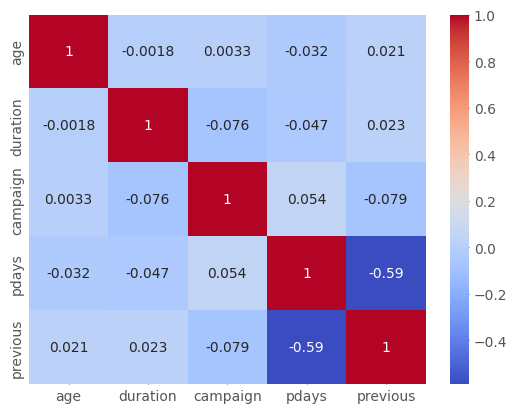

In [138]:

# Calcula la correlación entre las variables
correlation = df.corr()

# Muestra la matriz de correlación con un mapa de calor
sns.heatmap(correlation, annot=True, cmap='coolwarm')


In [139]:
#Función para extraer las columnas categóricas y las columnas numéricas en una lista separada para facilitar la EDA
def get_num_cat_cols(df1):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls

In [140]:
 #muestro las variables separadas por las columans numericas y categoricas 
num_cols, cat_cols = get_num_cat_cols(df)


Numerical columns 
 ['age', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


## 5.1 Estadisticas descriptivas 

In [141]:
#Estadísticas descriptivas para las variables numéricas
df[num_cols].describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [142]:
#Estadísticas descriptivas para las variables categoricas 
df[cat_cols].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


## *5.2* verifico los valores unicos de las variables categoricas

In [144]:
# Encuentre los valores únicos con conteos en variables categóricas y busque caracteres especiales para hacer la limpieza
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - job
----------------------------------------------------------------------------------------------------
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - marital
----------------------------------------------------------------------------------------------------
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - education
-------------------------------------------

## 5.3 Analisis Univariado 

Primero analizamos las variables categoricas individualmete y luego seguiremos con las numericas. 

In [145]:
# buscamos las variables categóricas
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


**5.3.1  Analisis de las variables categoricas por serapado, utilizamos graficos de barras.**

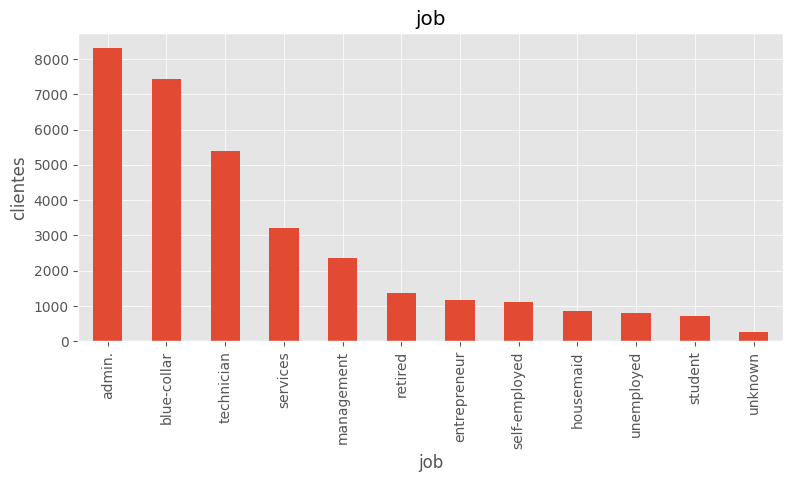

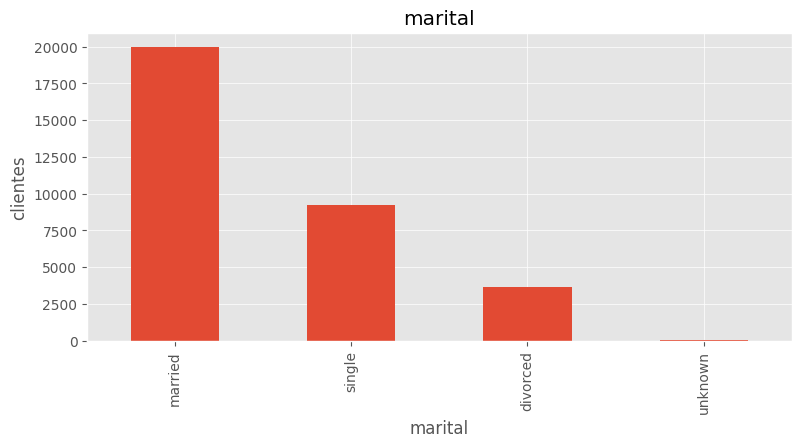

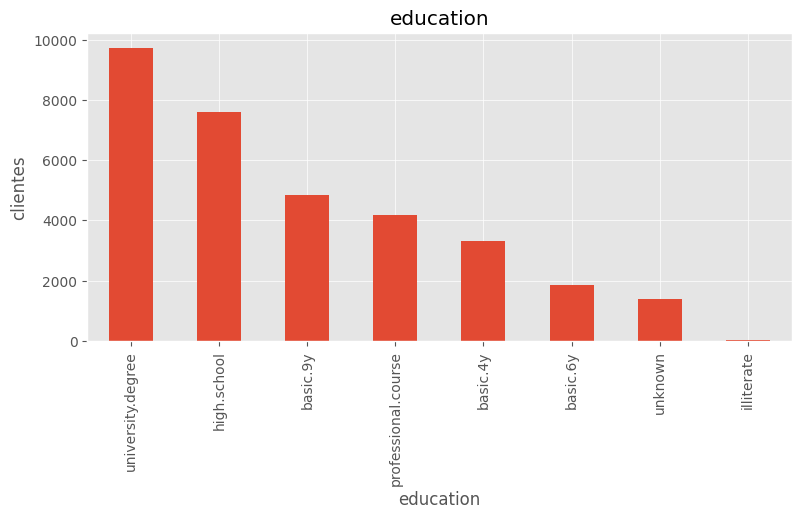

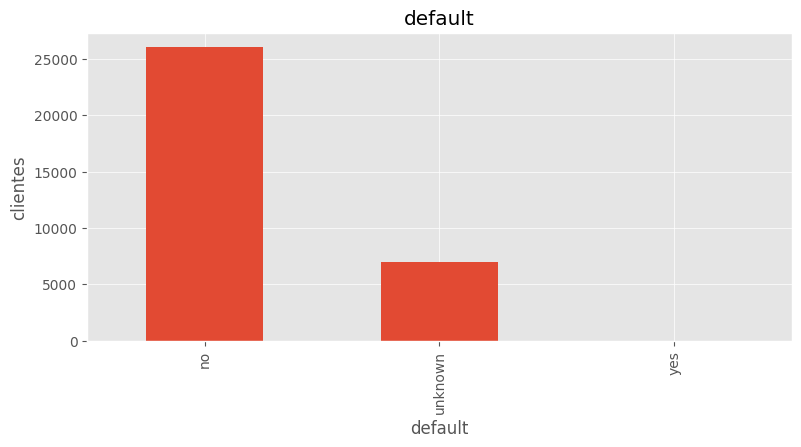

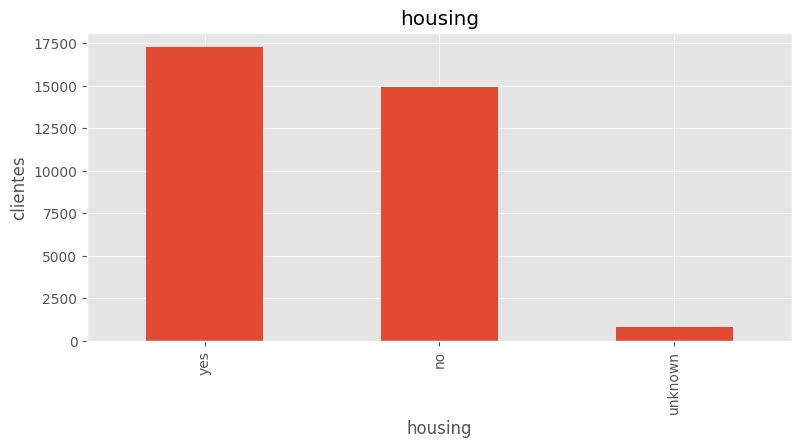

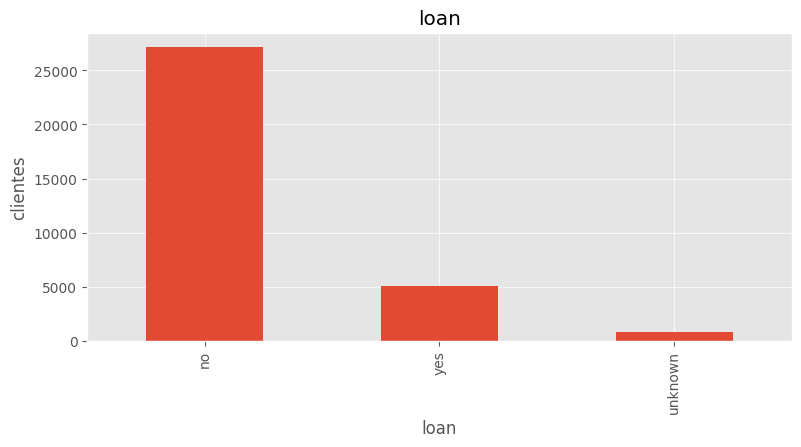

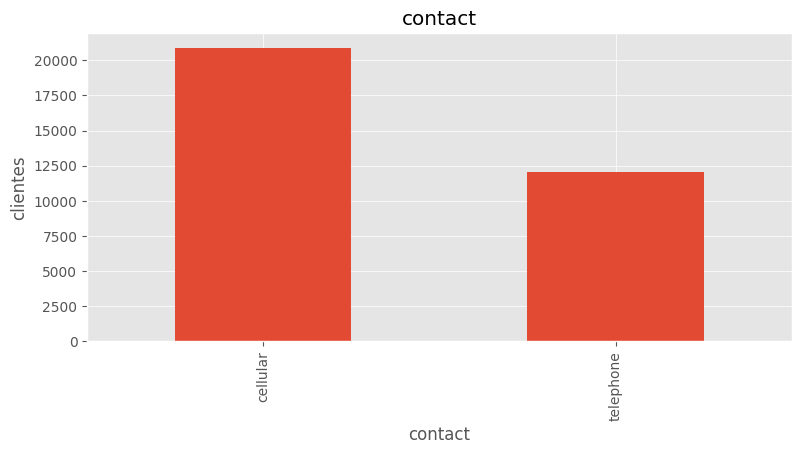

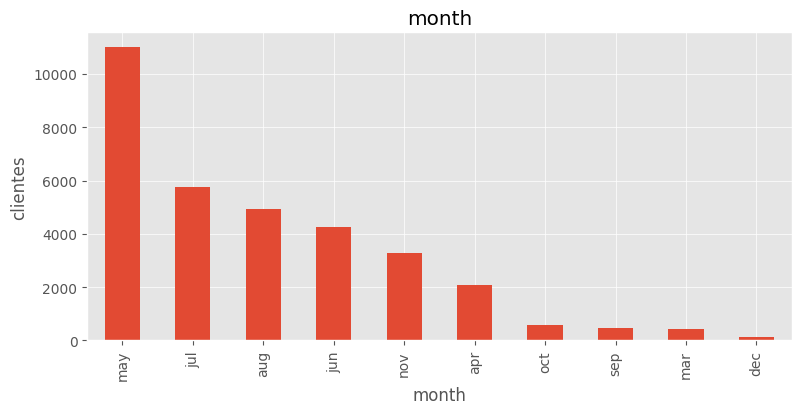

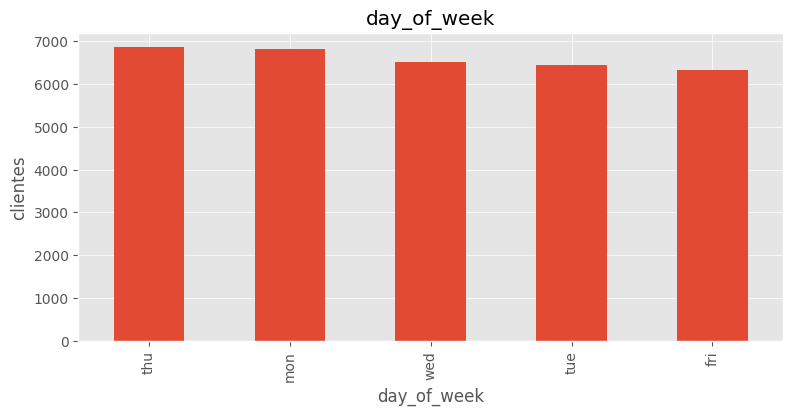

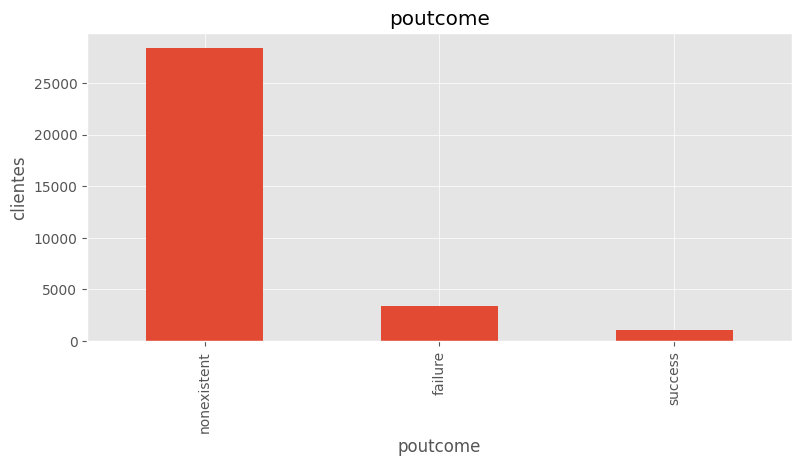

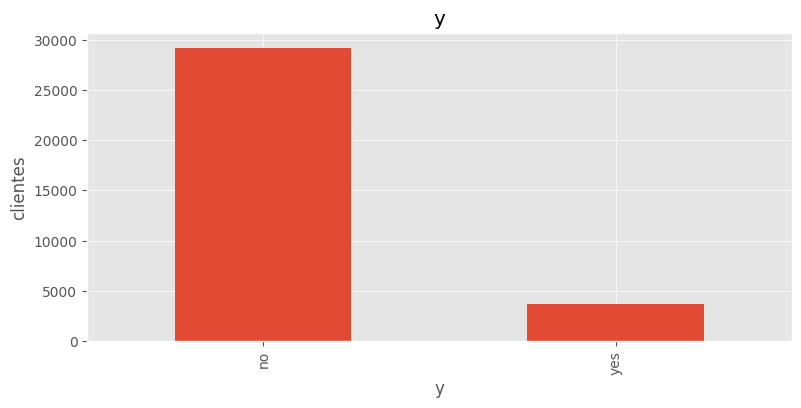

In [146]:
# gráfico de barras para cada variable categórica
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("clientes")
    plt.title(column)

**Con este analisis podemos obserbar que:**

1.   El mayor porcentaje de clientes del banco no adquiere plazo fijos
2.   El rdo de la campaña anterior no tuvo tanto exito.
3.   Vemos  que los celulares parecen ser el método preferido para comunicarse con los clientes, la mayoria han sido contactados en el mes de mayo.
4. Vemos que la mayoria de los clientes tienen un prestamo de vivienda y un porcentaje menos tienen prestamo personal. 
5. Notamos que los clientes no son deudores morosos. 
6. Las tres principales profesiones a las que pertenecen los clientes son: administración, trabajos manuales con esfuezo fisico y técnicos.
7. Un gran número de los clientes están casados y la mayoria tiene un nivel de estudio.

**5.3.2 Analisis de las variables numericas**


In [147]:
Num_variables = [col for col in df.columns if df[col].dtype != 'object']

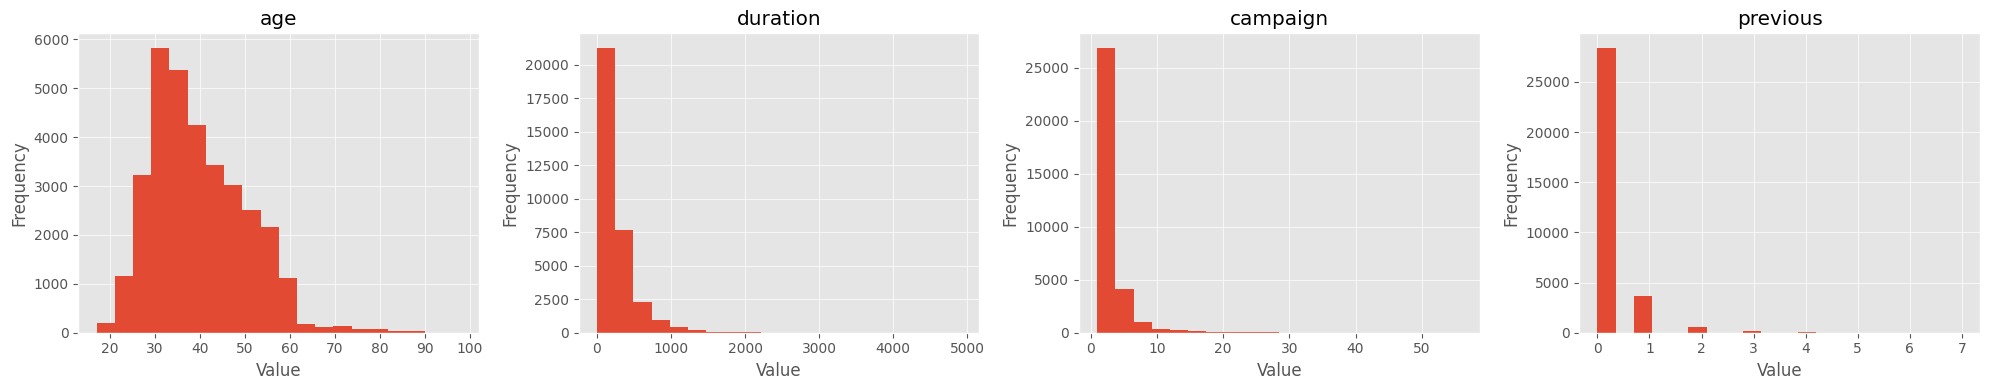

In [148]:
# Histograma para analizar variables numericas
plt.style.use("ggplot")
fig, axes = plt.subplots(1, len(["age", "duration", "campaign", "previous"]), figsize=(20, 4))

for i, column in enumerate(["age", "duration", "campaign", "previous"]):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Con este analis observamos que: 


*   Edad de los clientes va de los 20 años a los 90.
*   Duracion de la ultima llamada llamada: vemos que hay un mayor porcentaje de clientes con cero, eso significa que no accedieron a un deposito.
*   Campaign, es el n umero de contactos realizados a cada cliente: En este frafico podemos ver que la mayoria de los clientes fue contactado 1 sola vez. 
*   Previous, es el numero de contactos realizados antes de esta campaña: lo que podemos observar que la mayoria de los clientes fue contactado por primera vez en esta campaña. 


5.3.3 Analisis con graficos botplot 

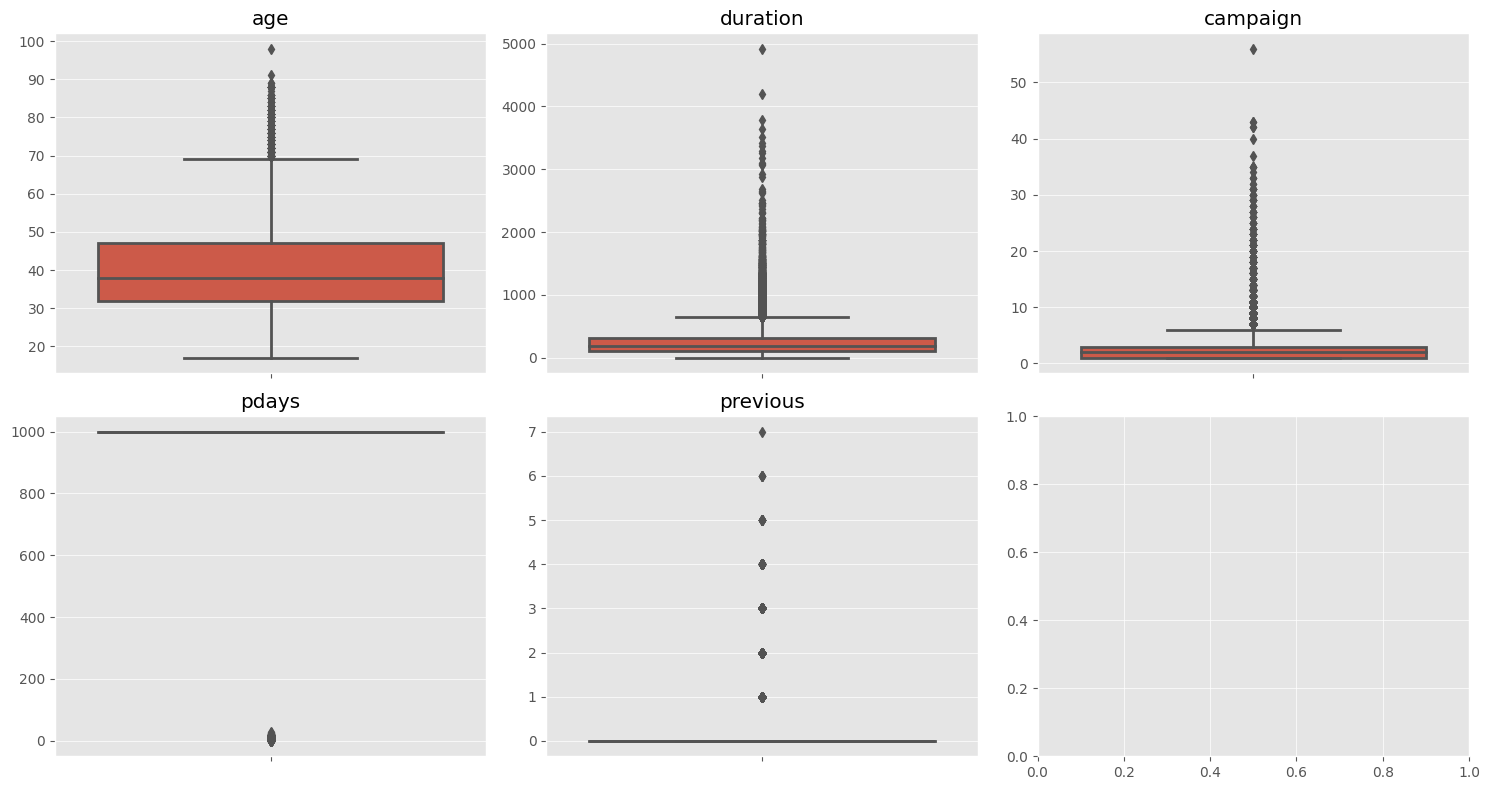

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea una cuadrícula de subplots con el número de columnas especificado
columns = 3
fig, axes = plt.subplots(len(Num_variables) // columns + 1, columns, figsize=(15, 8))

# Recorre las variables numéricas y traza el boxplot correspondiente en cada subplot
for i, variable in enumerate(Num_variables):
    row = i // columns
    col = i % columns
    sns.boxplot(data=df, y=variable, ax=axes[row,col])
    axes[row, col].set_title(variable)
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("")

# Elimina los subplots no utilizados
for j in range(i + 1, len(Num_variables)):
    row = j // columns
    col = j % columns
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


## **5.4 Analisis Bivariado**

## 5.4. Analisis bivariado: Realizamos el analisis individual de algunas de las variables con respecto a la variable objetivo.

**5.4.1 Primero analizamos la cantidad de clientes que optaron por un depósito a largo plazo.**

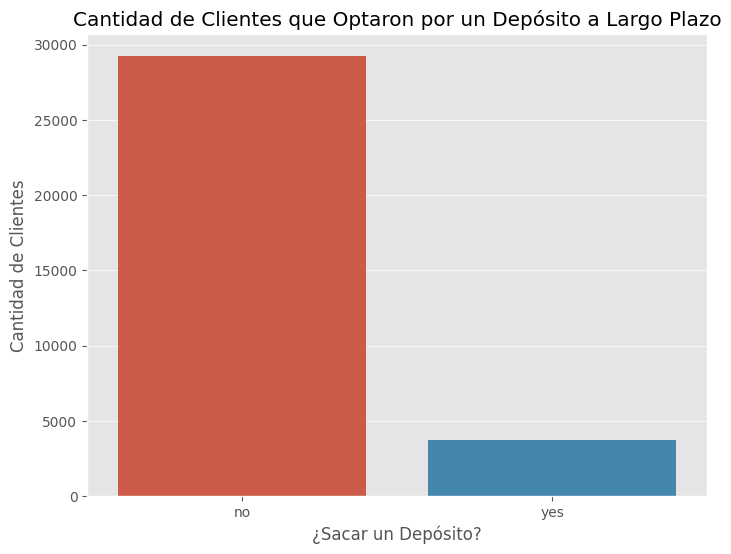

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.xlabel('¿Sacar un Depósito?')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes que Optaron por un Depósito a Largo Plazo')
plt.show()


**obs:** Que el el mayor porcentaje de sus clientes no accedieron a depositos de palzo fijo. 

**5.4.2  Buscamos analizar la relación entre la edad y la decisión de optar por un depósito a largo plazo**

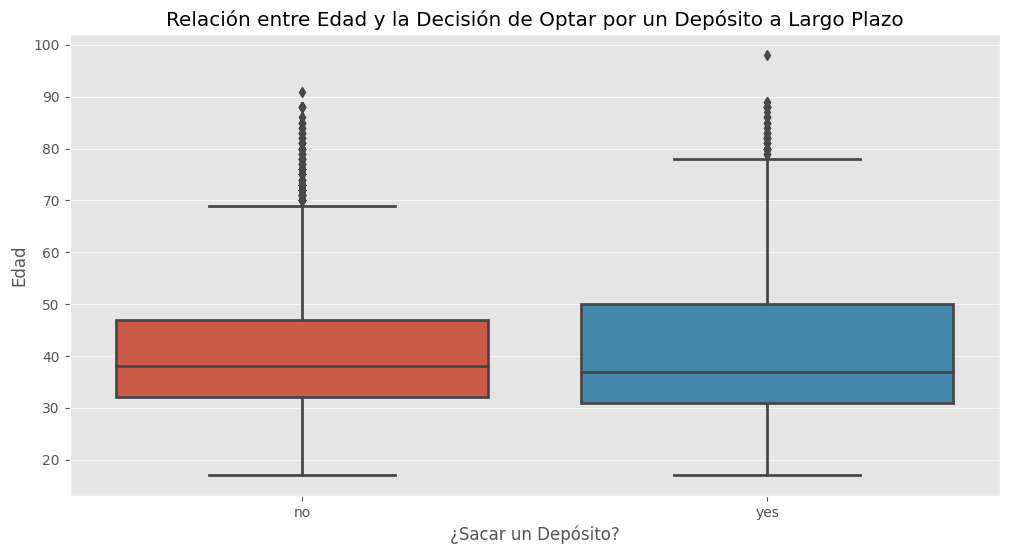

In [151]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='y', y='age')
plt.xlabel('¿Sacar un Depósito?')
plt.ylabel('Edad')
plt.title('Relación entre Edad y la Decisión de Optar por un Depósito a Largo Plazo')
plt.show()


**obs:** Que la edad no es una variable relevante para la toma de decision, por que el porcentaje de edades con el porcentaje de adquierir o no un deposito son casi iguales, por ende la edad no influye mucho en la toma de decision del cliente.

**5.4.3 Análisis de la relación entre el tipo de trabajo y la decisión de optar por un depósito a largo plazo:**

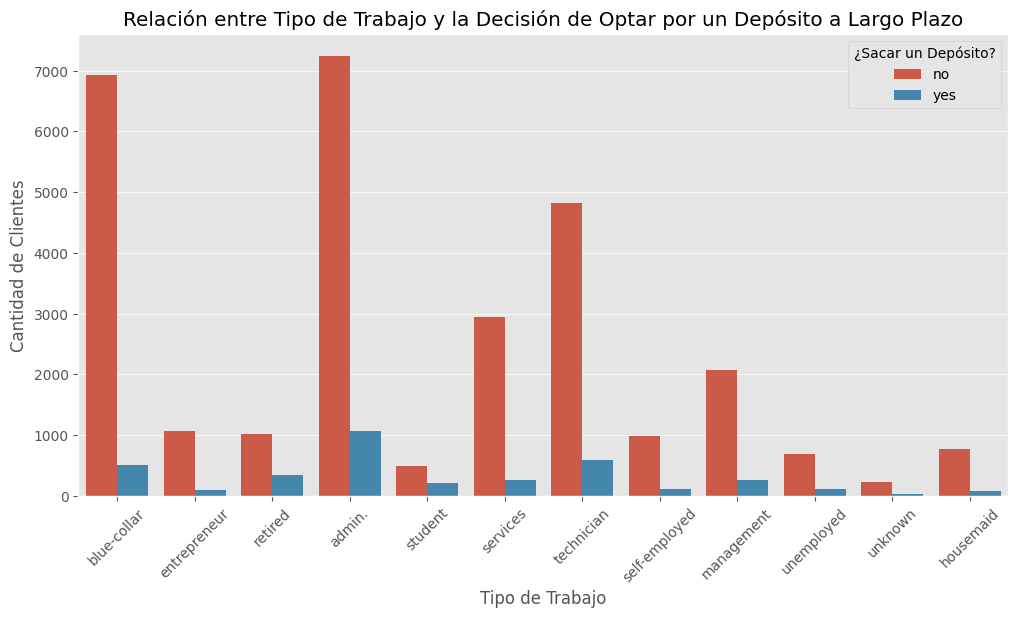

In [152]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Tipo de Trabajo y la Decisión de Optar por un Depósito a Largo Plazo')
plt.xticks(rotation=45)
plt.legend(title='¿Sacar un Depósito?')
plt.show()


**obs:** - Creemos que las persosas que tienen un mejor **trabajo** como admin, technician y blue collar suscriben mas a un deposito que el resto de los cliente.

**5.4.4 Análisis de la relación entre el estado civil y la decisión de optar por un depósito a largo plazo:** 


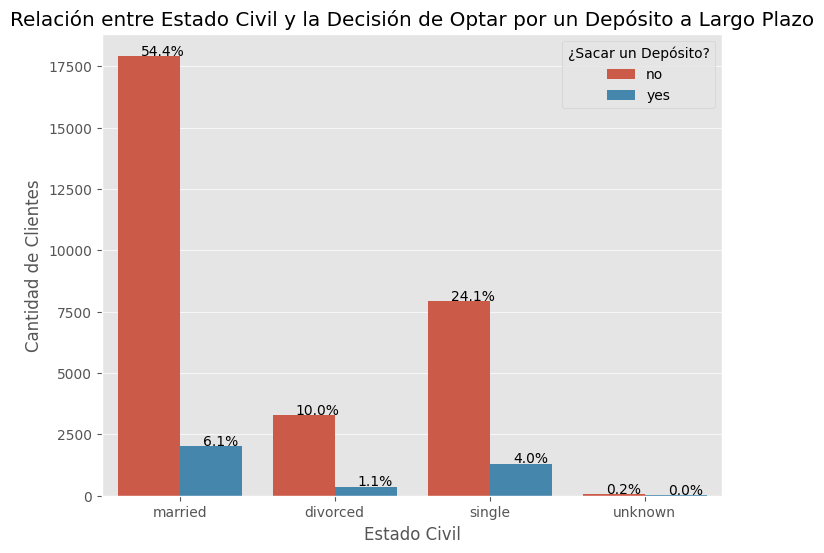

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='marital', hue='y')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Estado Civil y la Decisión de Optar por un Depósito a Largo Plazo')

# Calcula los porcentajes para cada categoría
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 30
    ax.annotate(percentage, (x, y))

plt.legend(title='¿Sacar un Depósito?')
plt.show()


**Obs:** Que la variable Estado Civil no es una variable que sea muy influyente a la hora de tomar esa decicion, por que el porcentaje de personas casadas con respecto a las personas solteras no hay mucha diferencia. 

**5.4.5 Análisis de la relación entre el nivel de educación y la decisión de optar por un depósito a largo plazo:**

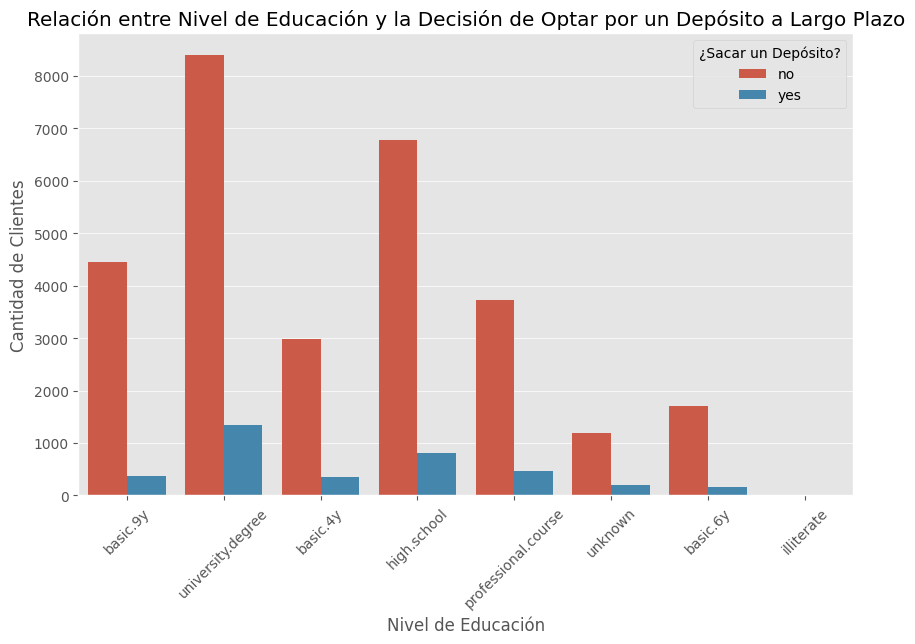

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='y')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Nivel de Educación y la Decisión de Optar por un Depósito a Largo Plazo')
plt.xticks(rotation=45)
plt.legend(title='¿Sacar un Depósito?')
plt.show()


**Obs:** En cuando a su **nivel eductivo**, vemos que el mayor porsentaje que suscribe Tienen un título universitario.

**5.4.6 Relación entre el estado de tener crédito en mora y la decisión de optar por un depósito a largo plazo:**

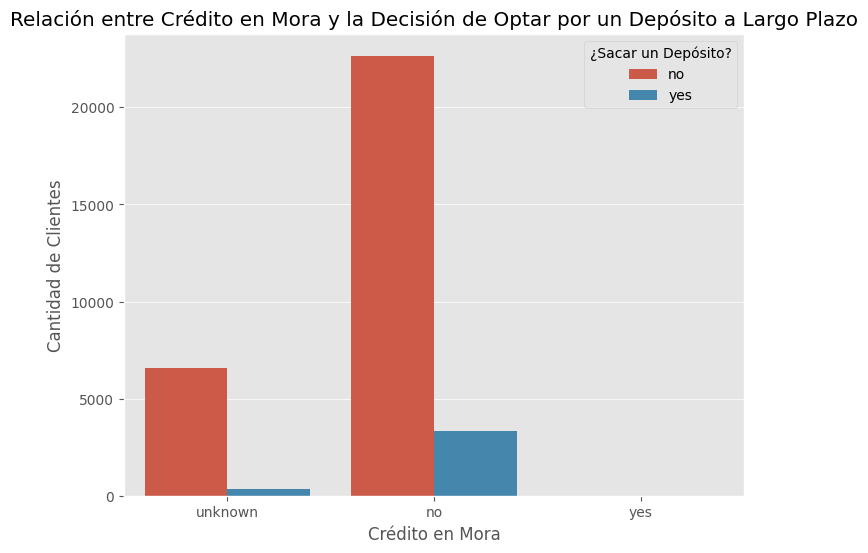

In [155]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='default', hue='y')
plt.xlabel('Crédito en Mora')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Crédito en Mora y la Decisión de Optar por un Depósito a Largo Plazo')
plt.legend(title='¿Sacar un Depósito?')
plt.show()


**obs:** que la variabele Credito en mora es una variable a tener en cuenta a la hora de buscar a los clientes potenciales por que las personas que acceden aun deposito ni una tiene un credito en mora. 

**5.4.7 Análisis de la relación entre tener préstamo de vivienda y la decisión de optar por un depósito a largo plazo:**


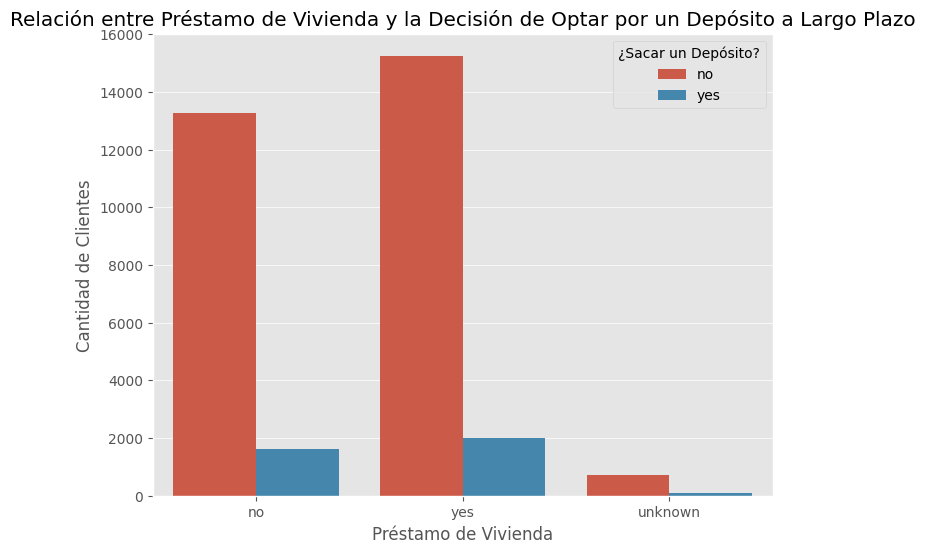

In [156]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='housing', hue='y')
plt.xlabel('Préstamo de Vivienda')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Préstamo de Vivienda y la Decisión de Optar por un Depósito a Largo Plazo')
plt.legend(title='¿Sacar un Depósito?')
plt.show()


**obs: Vemos que esta variable no es relevante para la toma de la decision de acceder o no a un deposito por que los porcentaje de los clientes que tienen o no el prestamo de la vivienda es casi el mismo. 

**5.4.8 #visualizamos la distribución de duración de la llamada según si el cliente suscribió o no a un depósito a plazo fijo**

Text(0, 0.5, 'Duración de llamada (segundos)')

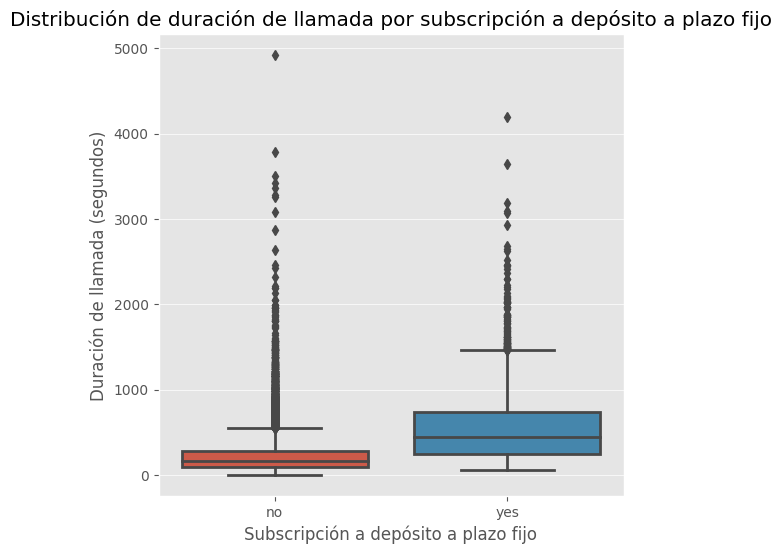

In [157]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Distribución de duración de llamada por subscripción a depósito a plazo fijo')
plt.xlabel('Subscripción a depósito a plazo fijo')
plt.ylabel('Duración de llamada (segundos)')


**obs:**  Que cuanto mas dura la llamada el cliente es mas propenso a acceder al deposito.

**5.4.9 Rango de edad de los clientes**

Text(0, 0.5, 'Cantidad')

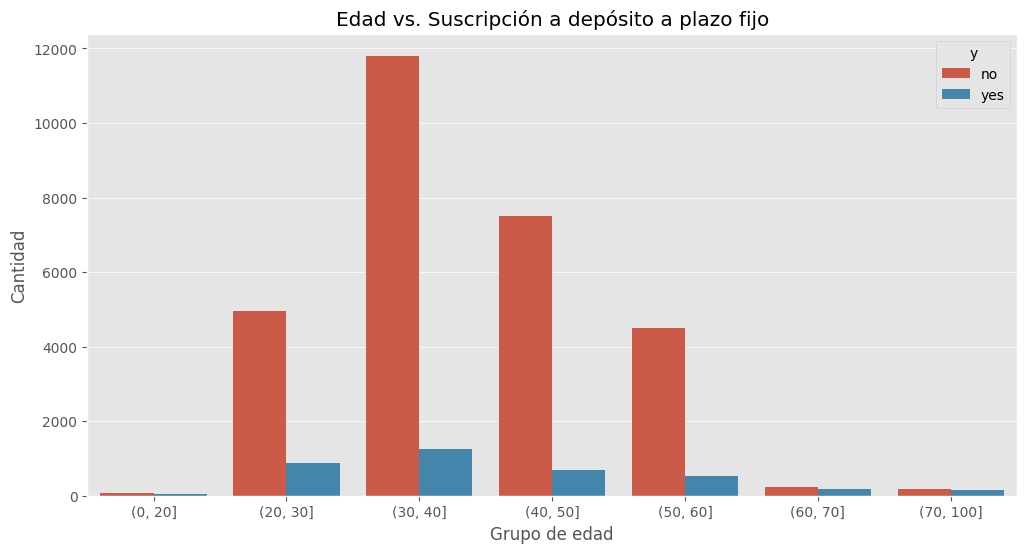

In [158]:
# Analixamos la variable "edad" 
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100])
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='y', data=df)
plt.title('Edad vs. Suscripción a depósito a plazo fijo')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')

**Obs: que el rango de edad que mas accede a un deposito va de 30 a 40 años**


**5.4.10 Comparamos la cantidad de clientes que se suscriben o no a un depósito a plazo fijo según la cantidad de contactos realizados previamente.**

Text(0, 0.5, 'Cantidad')

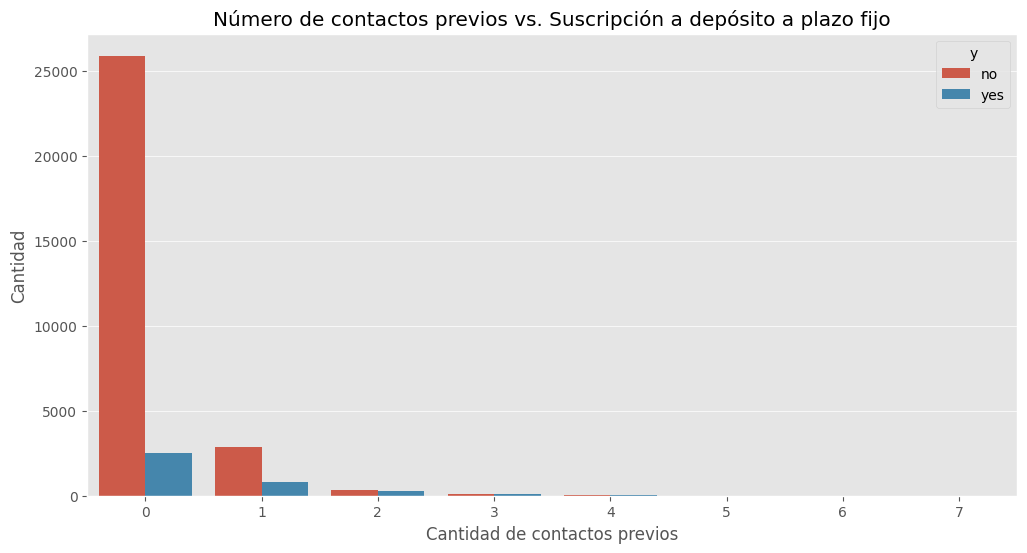

In [159]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='previous', hue='y')
plt.title('Número de contactos previos vs. Suscripción a depósito a plazo fijo')
plt.xlabel('Cantidad de contactos previos')
plt.ylabel('Cantidad')

**OBS: En este grafio podemos ver que el numero de personas que se suscriben mas a un deposito anteriormente no habia sido contactada.**

## **5.5 otro tipo de analisis bivariado para entender mejor la relacion entre la variables**


**5.5.1 usamos heatmap para visualizar la correlación entre dos variables numéricas. Esto te ayudará a entender la relación y la fuerza de la asociación entre ambas variables.**



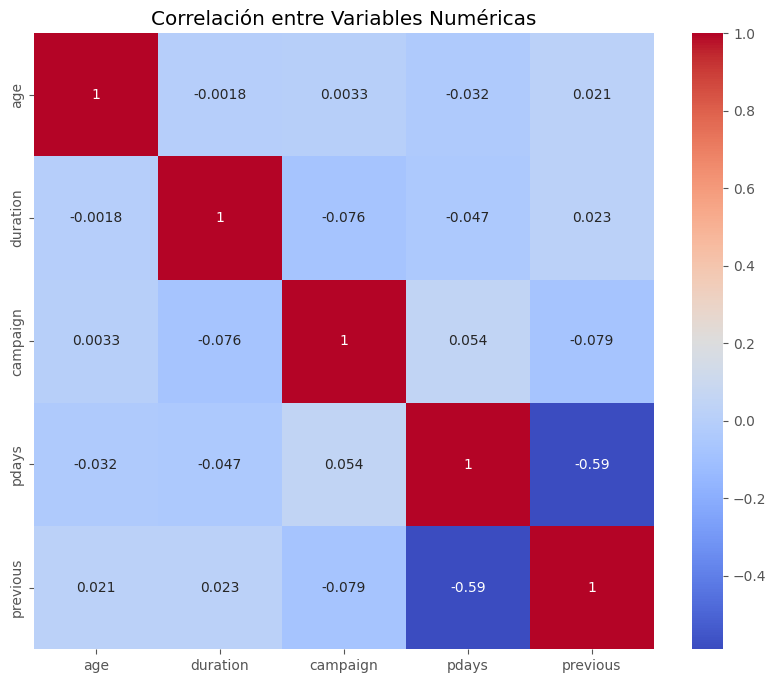

In [160]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'duration', 'campaign', 'pdays', 'previous']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()


**5.5.2 Dispersión te permite visualizar la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación y la posición en el eje x y el eje y indica los valores de las dos variables.**

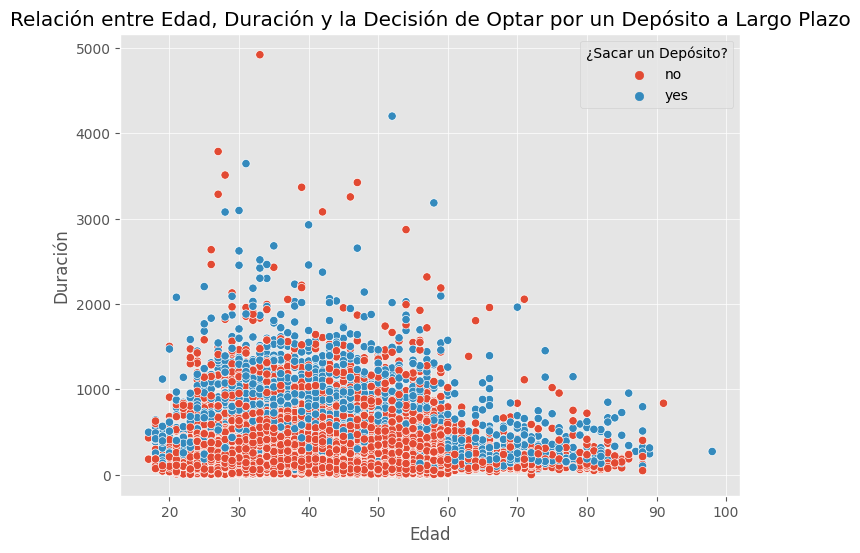

In [161]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='duration', hue='y')
plt.xlabel('Edad')
plt.ylabel('Duración')
plt.title('Relación entre Edad, Duración y la Decisión de Optar por un Depósito a Largo Plazo')
plt.legend(title='¿Sacar un Depósito?')
plt.show()



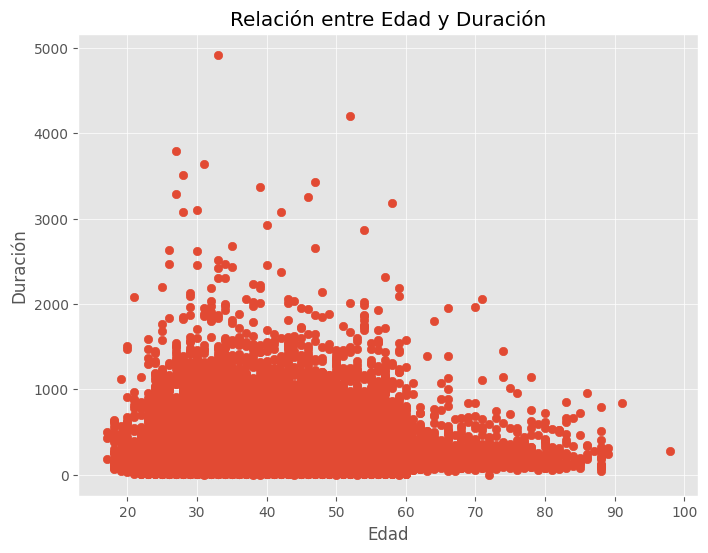

In [162]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['duration'])
plt.xlabel('Edad')
plt.ylabel('Duración')
plt.title('Relación entre Edad y Duración')
plt.show()


Un gráfico de barras apiladas es útil para visualizar la distribución de una variable categórica en función de otra variable categórica. Cada barra se divide en segmentos que representan las diferentes categorías de la segunda variable.

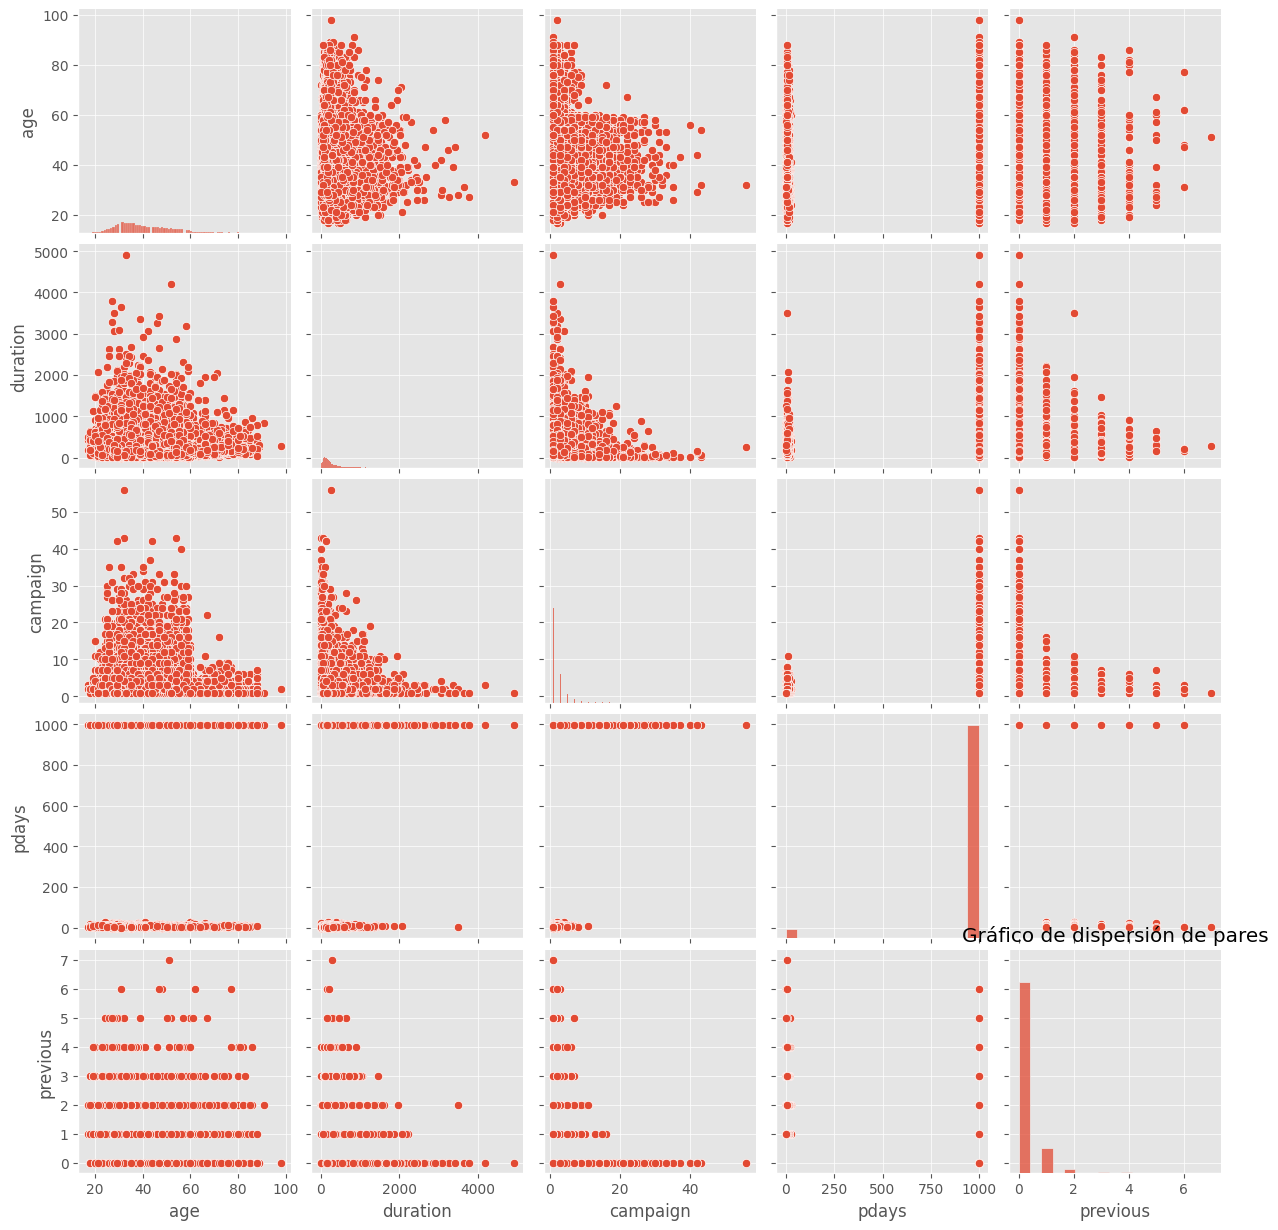

In [163]:
# Crear un gráfico de dispersión de pares
sns.pairplot(df[Num_variables])
plt.title("Gráfico de dispersión de pares")
plt.show()


## **6- Nuestra informacion segun el analisis de los datos**


**Resumen de observaciones y analisis realizados**

Nuestro objetivos es predecir cuales serian los clientes potenciales del banco que adquieran un deposito a plazo fijo para que el banco aumente sus gancias. 
Analisamos un conjunto de datos obtenidos de encuenstas realizada a clientes del banco, en la cual analizamos todas sus variables para encontrar al cliente "ideal". Este analisis sirve para la mayoria de entidades bancarias. 

**Conclusiones del Analisis realizado**

*   Notamos que mas del 80% de los clientes de este banco en este dataset no sacaron un deposito a plazo fijo. 
*   La edad de los clientes que tienen deposito en plazo fijo va de los 20 a los 100 años, concentrando su mayor porcentaje con respecto a la variable objetivo en el rango de edad de los 30 a los 50. Creemos que la edad no es una variable que influya significativamente a la hora de tomar la decision.
*   Se observa que más del 75% de los clientes tienen empleo. Dentro de esta categoría, se identificó que los clientes con trabajos en los siguientes tres rubros: administrativo, cuello azul y técnico, presentando una mayor probabilidad de adquirir un depósito a plazo plazo fijo y eso se puede deber a que sus ingresos son mayores.
*   Vemos que hay mayor porcentaje de clientes casados que divorciado y solteros en comparacion al total. Pero pudimos observar que no es una variable relevante para saber si el individuo va adquierir o no un deposito, ya que al comparar esta variable con la variable objetivo notamos que el porcentaje de personas casadas que acceden a un deposito es del 6% y de personas solteras es del 4%. 
*  Segun sus nivel educativo vemos que los clientes que adquierieron un deposito tienen titulo universitario o pertenecen a la escuela secundaria. 
* Observamos que los clientes que tienen credito en mora no sonclientes potenciales a adquierir un deposito. 
* En cambio vemos que la variable prestamo de vivienda no influye en el cliente, por que es minima la diferencia entre ambos clientes a la hora de acceder a un plazo fijo, vemos que no es una variable significativa con la variable objetivo.
* Observamos la variable Prestamo personal, y vemos que el porcentaje de personas que no tienen un credito en mucho mayor al que si lo tienen con respecto a la variable objetivo. Por lo que concluimos que los clientes con mas probabilidades de adquirir el deposito son clientes sin prestamo. 

* Con respecto a al campaña de marqueting realizada podemos observar que 


1.   Mayor porcentaje de sus cleintes accedio al deposito a traves de llamadas por celular. Vemos que es el medio mas elegido, pero no hay que descartar el telefono en linea por que por mas que el porcentaje sea minimo, se llega a personas que hoy en dia no se llega por celular. 
2.   Vemos que los meses mas efectivos de las llamadas fueron Mayo, Julio y agosto. 
3. Con respecto a los dias de la semana, No hay un dia que sea mas significativo que el otro. Vemos que los porcentajes son muy parecidos. 
4. vemos que con respecto al resultado de la campaña de marketing anterior ('fracaso', 'inexistente', 'éxito') Notamos que hay avances de con personas, vemos que esta campaña fue mas efectiva con respecto a la anterior. 






## **7- Dado el analisis anterior decidimos aplicar unos filtros para mejorar el analisis** 

##**Vamos a excluir del analis algunas variables como:**

* **Estado cívil (marital):**
('divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)
*   **Alojamiento (housing):**
Tiene préstamo de vivienda? ('no', 'sí', 'desconocido')
*   **Contacto (contact):**
Tipo de comunicación de contacto ('celular', 'teléfono')
*   **Mes (month):**
Último contacto mes del año ('ene', 'feb', 'mar', …, 'nov', 'dec')
*  **Día de la semana(dayofweek):**
último día de contacto de la semana ('lunes', 'martes', 'miércoles', 'jueves', 'viernes'
*  **duración (duration):**
Duración del último contacto, en segundos. Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no')

* **Campaña (campaign):**
número de contactos realizados durante esta campaña y para este cliente (incluye último contacto)

* **Días pasados (pdays):**
número de días que pasaron desde la última vez que se contactó al cliente de una campaña anterior (999 significa que no se contactó al cliente anteriormente)

* **Anterior (previous):**
Número de contactos realizados antes de esta campaña y para este cliente

* **Resultado (poutcome):**
resultado de la campaña de marketing anterior ('fracaso', 'inexistente', 'éxito')
 
Porque exclui tantas variables? Por que mi objetivo es encontrar las caracterirsticas del cliente que es mas propenso a acceder a un deposito, no quiero analizar la campaña de marketing. Creo que encontrando al cliente ideal, podemos enfocar la campaña directo a esas personas y asi conseguir mas clientes. 

##**Nos quedamos con las siguientes variables**

**Edad (age):** 
Edad en años

### **variables categoricas** que devemos tranformar a numericas

**Tipo de trabajo (job):**
('administrador', 'cuello azul', 'empresario', 'criada', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante', 'técnico', ' desempleado', 'desconocido')

**Nivel de educación (education):**
('básico.4 años','básico.6 años','básico.9 años','bachillerato','analfabetos','curso.profesional','título.universitario','desconocido')

**Defecto (default):**
tiene credito en mora? ('no', 'sí', 'desconocido')

**Préstamo (loan):**
Tiene préstamo personal? ('no', 'sí', 'desconocido')





### 7.1- **Elimino las variables que no voy a usar y me armo un nuevo dataset**


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  object  
 2   marital      32950 non-null  object  
 3   education    32950 non-null  object  
 4   default      32950 non-null  object  
 5   housing      32950 non-null  object  
 6   loan         32950 non-null  object  
 7   contact      32950 non-null  object  
 8   month        32950 non-null  object  
 9   day_of_week  32950 non-null  object  
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  object  
 15  y            32950 non-null  object  
 16  age_group    32950 non-null  category
dtypes: category(1), int64(5), object(11)
memory usage: 4.1+ MB


In [165]:
df1 = df.copy()

# Eliminamos las variables que no queriamos
df1 = df1.drop(columns=['marital', 'housing' , 'contact', 'month', 
     'day_of_week', 'duration', 'campaign', 'pdays', 'previous','poutcome','age_group'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32950 non-null  int64 
 1   job        32950 non-null  object
 2   education  32950 non-null  object
 3   default    32950 non-null  object
 4   loan       32950 non-null  object
 5   y          32950 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


7.2 **Cambio las variables categoricas a numericas para poder hacer modelos de ml**

In [166]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el Label Encoding a las variables categóricas
df1['job_encoded'] = label_encoder.fit_transform(df['job'])
df1['education_encoded'] = label_encoder.fit_transform(df['education'])
df1['default_encoded'] = label_encoder.fit_transform(df['default'])
df1['loan_encoded'] = label_encoder.fit_transform(df['loan'])
df1['y'] = label_encoder.fit_transform(df['y'])


In [167]:
df1.head(5)

,age,job,education,default,loan,y,job_encoded,education_encoded,default_encoded,loan_encoded
0,49,blue-collar,basic.9y,unknown,no,0,1,2,1,0
1,37,entrepreneur,university.degree,no,no,0,2,6,0,0
2,78,retired,basic.4y,no,no,1,5,0,0,0
3,36,admin.,university.degree,no,no,0,0,6,0,0
4,59,retired,university.degree,no,no,0,5,6,0,0


7.3 -**Elimino las variables originales asi solo me quedo con las categoricas**

In [168]:
df2= df1.drop(columns=['job', 'education' , 'default', 'loan'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                32950 non-null  int64
 1   y                  32950 non-null  int64
 2   job_encoded        32950 non-null  int64
 3   education_encoded  32950 non-null  int64
 4   default_encoded    32950 non-null  int64
 5   loan_encoded       32950 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [169]:
df2.shape

(32950, 6)

In [170]:
# Calcular la varianza y la media de cada variable
variances = np.var(df2, axis=0)
means = np.mean(df2, axis=0)
# Imprimir los resultados
for i, variable in enumerate(df2.columns):
    print(f"Variable: {variable}")
    print(f"Varianza: {variances[i]}")
    print(f"Media: {means[i]}")
    print("----------------------------------------")

Variable: age
Varianza: 108.23236533488685
Media: 40.01411229135053
----------------------------------------
Variable: y
Varianza: 0.09996426829633347
Media: 0.11265553869499241
----------------------------------------
Variable: job_encoded
Varianza: 12.915978939902965
Media: 3.7233687405159333
----------------------------------------
Variable: education_encoded
Varianza: 4.566535053571306
Media: 3.7488315629742033
----------------------------------------
Variable: default_encoded
Varianza: 0.16654791160561938
Media: 0.21080424886191199
----------------------------------------
Variable: loan_encoded
Varianza: 0.5256602393381243
Media: 0.3290440060698027
----------------------------------------


## **8-Prueba y entrenamiento de los modelos**

### 8.1 **Entrenamiento y testeo de las variables**




In [171]:
 from sklearn.model_selection import train_test_split 
 # Dividir el dataset en conjuntos de entrenamiento y prueba 
 X_train, X_test, y_train, y_test = train_test_split(df2.drop('y', axis=1), df2['y'], test_size=0.2, random_state=42) 

**8.1.a - Probamos Regresión Logística:** 

In [172]:
from sklearn.metrics import f1_score

# Crear una instancia del modelo
mode1 = LogisticRegression()

# Entrenar el modelo
mode1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mode1.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.8798179059180576
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


 El modelo de regresión logística tiene una precisión bastante alta, con una exactitud del 87,98%. Sin embargo, las métricas de precisión, recordar, F1-score y AUC-ROC son todas muy bajas, todas cercanas a 0. Esto indica que el modelo tiene dificultades para clasificar correctamente las instancias positivas, es decir, las que corresponden a clientes que adquirió un depósito a plazo fijo. En base a estas métricas, el modelo de regresión logística no parece ser el más adecuado para este problema.

**8.1.b-Probamos Árboles de Decisión:** 

In [173]:

# Crear una instancia del modelo
mode2 = DecisionTreeClassifier()

# Entrenar el modelo
mode2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mode2.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)


Accuracy: 0.8714719271623672
Precision: 0.302158273381295
Recall: 0.05303030303030303
F1-score: 0.09022556390977443
AUC-ROC: 0.5181501980829335


 El modelo de árbol de decisión presenta una precisión ligeramente inferior a la de regresión logística, con un valor del 87,13%. Sin embargo, las métricas de precisión, recordar, F1-score y AUC-ROC también son bajas, lo que indica dificultades en la clasificación de las instancias positivas. Aunque el árbol de decisión obtiene mejores resultados que la regresión logística en algunas métricas, aún no parece ser un modelo altamente efectivo para este problema.

  **PROBAMOS NUEVOS MODELOS** 
ninguno de los dos modelos (regresión logística y árbol de decisión) parece ser el más adecuado para predecir con precisión qué clientes adquirirán un depósito a plazo fijo.
 

**8.1.c. -Bosque Aleatorio - Random Forest**

In [174]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest
model_rf = RandomForestClassifier()

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)

# Imprimir las métricas
print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-score (Random Forest):", f1_rf)
print("AUC-ROC (Random Forest):", auc_roc_rf)


Accuracy (Random Forest): 0.87298937784522
Precision (Random Forest): 0.3404255319148936
Recall (Random Forest): 0.06060606060606061
F1-score (Random Forest): 0.10289389067524116
AUC-ROC (Random Forest): 0.5222830234040996


**8.1.d -Probamos el modelo Aumento de Gradiente - Gradient Boosting**

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo Gradient Boosting
model_gb = GradientBoostingClassifier()

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = model_gb.predict(X_test)

# Calcular métricas de evaluación
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_roc_gb = roc_auc_score(y_test, y_pred_gb)

# Imprimir las métricas
print("Accuracy (Gradient Boosting):", accuracy_gb)
print("Precision (Gradient Boosting):", precision_gb)
print("Recall (Gradient Boosting):", recall_gb)
print("F1-score (Gradient Boosting):", f1_gb)
print("AUC-ROC (Gradient Boosting):", auc_roc_gb)



Accuracy (Gradient Boosting): 0.8786039453717754
Precision (Gradient Boosting): 0.3888888888888889
Recall (Gradient Boosting): 0.017676767676767676
F1-score (Gradient Boosting): 0.033816425120772944
AUC-ROC (Gradient Boosting): 0.5069411779053035


En comparación con los modelos anteriores, podemos observar que los resultados de Bosque Aleatorio y Gradient Boosting muestran un ligero incremento en términos de accuracy y precision. Sin embargo, el recall, el F1-score y el AUC-ROC siguen siendo bajos para ambos modelos.

## **8.2-Analizar las características importantes**

**8.2.a -Características importantes - Regresión Logística:**

In [176]:
# Obtener las características importantes
importances_mode1 = mode1.coef_[0]

# Crear un DataFrame con las características y sus importancias
feature_importances_mode1 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_mode1})
feature_importances_mode1 = feature_importances_mode1.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Imprimir las características importantes
print("Características importantes - Regresión Logística:")
print(feature_importances_mode1)


Características importantes - Regresión Logística:
             Feature  Importance
0  education_encoded    0.057973
1        job_encoded    0.016043
2                age    0.015452
3       loan_encoded   -0.012790
4    default_encoded   -0.933017


**8.2.b -Características importantes: Árbol de Decisión:**




In [177]:
# Obtener las características importantes
importances_mode2 = mode2.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances_mode2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_mode2})
feature_importances_mode2 = feature_importances_mode2.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Imprimir las características importantes
print("Características importantes - Árbol de Decisión:")
print(feature_importances_mode2)


Características importantes - Árbol de Decisión:
             Feature  Importance
0                age    0.467414
1        job_encoded    0.210405
2  education_encoded    0.180643
3       loan_encoded    0.106061
4    default_encoded    0.035477


**8.2.C .Características importantes - Bosque Aleatorio:**

In [178]:
# Obtener las características importantes
importances_rf = model_rf.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_rf})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Imprimir las características importantes
print("Características importantes - Bosque Aleatorio:")
print(feature_importances_rf)


Características importantes - Bosque Aleatorio:
             Feature  Importance
0                age    0.633176
1        job_encoded    0.175285
2  education_encoded    0.116806
3       loan_encoded    0.045511
4    default_encoded    0.029222


**8.2.d -Características importantes - Aumento de Gradiente:**

In [179]:
# Obtener las características importantes
importances_gb = model_gb.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
feature_importances_gb = feature_importances_gb.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Imprimir las características importantes
print("Características importantes - Aumento de Gradiente:")
print(feature_importances_gb)


Características importantes - Aumento de Gradiente:
             Feature  Importance
0                age    0.606376
1        job_encoded    0.140351
2    default_encoded    0.133961
3  education_encoded    0.103282
4       loan_encoded    0.016030


## **8.3- Buscamos Hiperparametros optimos** 

**8.3.a** - HIPERPARAMETROS DE REGRESION LOGISTICA

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Regresión Logística
model = LogisticRegression()

# Definir los hiperparámetros a ajustar
parameters = {'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'sag', 'lbfgs']}

# Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Reentrenar el modelo con los mejores hiperparámetros
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)


Mejores hiperparámetros: {'C': 0.1, 'solver': 'liblinear'}


LogisticRegression(C=0.1, solver='liblinear')

**8.3.b** HIPERPARAMETROS RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo de Bosque Aleatorio
model = RandomForestClassifier()

# Definir los hiperparámetros a ajustar y sus rangos de valores
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

# Realizar la búsqueda de hiperparámetros mediante búsqueda aleatoria
random_search = RandomizedSearchCV(model, parameters, n_iter=3, cv=5)
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Reentrenar el modelo con los mejores hiperparámetros
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)


Mejores hiperparámetros: {'n_estimators': 100, 'max_depth': 10}


RandomForestClassifier(max_depth=10)

## **8.4** CREAMOS LOS MODELOS CON LOS HIPERPARAMETROS OPTIMIZADOS (1)

In [181]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo con los hiperparámetros optimizados
model_rf = RandomForestClassifier(max_depth=10, n_estimators=200)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred_rf = model_rf.predict(X_test)


In [182]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo con los hiperparámetros optimizados
model_lr = LogisticRegression(C=0.1, solver='liblinear')

# Entrenar el modelo con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred_lr = model_lr.predict(X_test)


##  **8.5** Entrenamos los modelos con los hiperparámetros optimizados

**8.5.a** - Vemos el modelo ya entrenado de REGRESION LOGISTICA


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Crear el modelo con los hiperparámetros optimizados
model_lr = LogisticRegression(C=0.1, solver='liblinear')

# Entrenar el modelo con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred_lr = model_lr.predict(X_test)

# Imprimir el informe de clasificación
print("Informe de Clasificación - LogisticRegression:")
print(classification_report(y_test, y_pred_lr))


Informe de Clasificación - LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



**8.5.b** -Vemos el modelo ya entrenado DE RANDOM FOREST

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo con los hiperparámetros optimizados
model_rf = RandomForestClassifier(max_depth=10, n_estimators=200)

# Entrenar el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred_rf = model_rf.predict(X_test)

# Imprimir el informe de clasificación
print("Informe de Clasificación - RandomForestClassifier:")
print(classification_report(y_test, y_pred_rf))


Informe de Clasificación - RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.49      0.03      0.05       792

    accuracy                           0.88      6590
   macro avg       0.69      0.51      0.49      6590
weighted avg       0.84      0.88      0.83      6590



a pesar de todo lo que venimos haciendo segumos viendo que hay una diferencia significativa hacia la clase 1 del problema. por lo que vamos a aplicar tecnicas que nos ayuden a mejorar el analisis. Vamos a probar distintas tecnicas y luego las vamos a comparar para ver vual es mejor

## **8.6** Nuevos ajustes de hiperparámetros y reentrenamiento de los modelos:

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir los hiperparámetros que quieres ajustar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Crear una instancia del modelo
logreg = LogisticRegression()

# Crear la búsqueda en grid
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Ajustar el modelo
logreg_cv.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros: ", logreg_cv.best_params_)


Mejores hiperparámetros:  {'C': 0.001}


**8.6.a**- reentreno los modelos 

In [187]:
# Reentrenar el modelo de Regresión Logística
logreg = LogisticRegression(C=0.001)
logreg.fit(X_train, y_train)


LogisticRegression(C=0.001)

In [188]:
# Reentrenar el modelo de Bosque Aleatorio
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

## **8.7** PROBAMOS EL MODELO YA ENTRENADO. 

**8.7.a** Regresion logistica 

In [189]:
from sklearn.metrics import classification_report

# Definir el modelo de Regresión Logística
logreg = LogisticRegression(C=0.001)

# Entrenar el modelo de Regresión Logística
logreg.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred_logreg = logreg.predict(X_test)

# Calcular las métricas de rendimiento
print("Informe de clasificación para la Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))



Informe de clasificación para la Regresión Logística:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



**8.7.b** Bosque aleatorio

In [190]:
from sklearn.metrics import classification_report

# Definir el modelo de Bosque Aleatorio
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

# Entrenar el modelo de Bosque Aleatorio
rf.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred_rf = rf.predict(X_test)

# Calcular las métricas de rendimiento
print("Informe de clasificación para el Bosque Aleatorio:")
print(classification_report(y_test, y_pred_rf))


Informe de clasificación para el Bosque Aleatorio:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5798
           1       0.45      0.02      0.04       792

    accuracy                           0.88      6590
   macro avg       0.66      0.51      0.49      6590
weighted avg       0.83      0.88      0.83      6590



**comparamos los modelos**

In [193]:
from sklearn.metrics import roc_auc_score

# Calcular el AUC para cada modelo
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Comparar los AUC
print("AUC de la Regresión Logística:", auc_logreg)
print("AUC del Bosque Aleatorio:", auc_rf)


AUC de la Regresión Logística: 0.5
AUC del Bosque Aleatorio: 0.5089213539325647


**interpretamos los modelos** 

In [198]:

# Supongamos que 'df' es tu DataFrame y 'target' es el nombre de tu variable objetivo
X = df.drop('y', axis=1)

# Obtén las importancias de las características
importances = rf.feature_importances_

# Ordena las características por importancia
sorted_indices = np.argsort(importances)[::-1]

# Muestra las características más importantes
for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")


age: 0.5756923260775662
job: 0.16875562869709917
marital: 0.12962590931533044
education: 0.07322679893695401
default: 0.05269933697305024


## **Oversampling (sobremuestreo)** regresion logistica

Sobremuestreo para Regresión Logística:

In [199]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Aplicar balanceo de clases
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Crear el modelo de Regresión Logística con hiperparámetros optimizados
logistic_model = LogisticRegression(C=0.1, solver='liblinear')
logistic_model.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba original
y_pred = logistic_model.predict(X_test)

# Evaluar el desempeño del modelo
print("Informe de Clasificación - Logistic Regression:")
print(classification_report(y_test, y_pred))



Informe de Clasificación - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.42      0.58      5798
           1       0.15      0.73      0.24       792

    accuracy                           0.46      6590
   macro avg       0.53      0.57      0.41      6590
weighted avg       0.83      0.46      0.54      6590



Sobremuestreo para Bosque Aleatorio:

In [200]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aplicar oversampling al conjunto de entrenamiento
oversampler = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Crear el modelo de Bosque Aleatorio con hiperparámetros optimizados
random_forest_model = RandomForestClassifier(max_depth=10, n_estimators=200)
random_forest_model.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba original
y_pred = random_forest_model.predict(X_test)

# Evaluar el desempeño del modelo
print("Informe de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred))


Informe de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      5798
           1       0.19      0.63      0.29       792

    accuracy                           0.63      6590
   macro avg       0.56      0.63      0.52      6590
weighted avg       0.84      0.63      0.69      6590



## **Undersampling (submuestreo):**

Submuestreo para Regresión Logística:

In [201]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Aplicar undersampling al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Crear el modelo de Regresión Logística con hiperparámetros optimizados
logistic_model = LogisticRegression(C=0.1, solver='liblinear')
logistic_model.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba original
y_pred = logistic_model.predict(X_test)

# Evaluar el desempeño del modelo
print("Informe de Clasificación - Logistic Regression:")
print(classification_report(y_test, y_pred))


Informe de Clasificación - Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55      5798
           1       0.15      0.76      0.25       792

    accuracy                           0.44      6590
   macro avg       0.53      0.58      0.40      6590
weighted avg       0.83      0.44      0.52      6590



Submuestreo para Bosque Aleatorio:

In [202]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aplicar undersampling al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Crear el modelo de Bosque Aleatorio con hiperparámetros optimizados
random_forest_model = RandomForestClassifier(max_depth=10, n_estimators=200)
random_forest_model.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba original
y_pred = random_forest_model.predict(X_test)

# Evaluar el desempeño del modelo
print("Informe de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred))


Informe de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      5798
           1       0.18      0.64      0.29       792

    accuracy                           0.61      6590
   macro avg       0.56      0.63      0.51      6590
weighted avg       0.84      0.61      0.68      6590



 ## seleccion del algoritmo. informe de clasificación con validación cruzada y búsqueda de hiperparámetros:

In [207]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_params = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
logistic_regression_grid = GridSearchCV(logistic_regression_model, logistic_regression_params, cv=5)
logistic_regression_grid.fit(X_train_balanced, y_train_balanced)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}
random_forest_grid = GridSearchCV(random_forest_model, random_forest_params, cv=5)
random_forest_grid.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]})

## **Entrenamiento del modelo elegido**
 Si el modelo de Random Forest ha mostrado un mejor rendimiento en términos de métricas como el AUC y el MSE, puedes considerarlo como tu modelo elegido. A partir de este punto, puedes proceder con las siguientes acciones

In [208]:
random_forest_model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier()

In [209]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener las predicciones del modelo
y_pred = random_forest_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Generar informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)


Matriz de Confusión:
[[3269 2529]
 [ 306  486]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.56      0.70      5798
           1       0.16      0.61      0.26       792

    accuracy                           0.57      6590
   macro avg       0.54      0.59      0.48      6590
weighted avg       0.82      0.57      0.64      6590

